# Logistic Regression

### Architecture
    * Relu in hidden layers and sigmoid in the output layer
    * Number of layers and number of units in each layer can be set using `layers_dims` hyper-parameter
    * Uses sigmoid cross entropy for loss computation
   
### Dependencies
    * Numpy
    * Matplotlib

## Import dependencies

In [7]:
import numpy as np
from utils.lr_utils import load_data, plot_training

## Parameters Initialization

In [30]:
def initialize_parameters(layers_dims):
    '''
    Arguments:
    layers_dims -- a list of dimensions of each layer of our network
    
    Returns:
    parameters -- a dictionary containing weights and biases of the network
    '''

    parameters = {}
    for l in range(len(layers_dims)-1):
        parameters['W' + str(l+1)] = np.random.randn(layers_dims[l+1], layers_dims[l]) * 0.01
        parameters['b' + str(l+1)] = np.zeros([layers_dims[l+1], 1])
    
    return parameters

## Forward Propogation

In [3]:
def relu(X):
    return np.maximum(X, 0)

def sigmoid(X):
    return 1 / (1 + np.exp(-1 * X))

In [4]:
def forward_propogation(A, parameters):
    '''
    Implement the forward propogation in the network
    
    Arguments:
    A -- input to the network
    parameters -- a dictionary containing weights and biases of the network
    
    Returns:
    A -- Post activation value of the last layer
    caches -- cache of all activation values, required for backpropogation 
    '''
    
    L = len(parameters) // 2 # no. of layers
    caches  = {}
    for l in range(L):
        W = parameters['W' + str(l+1)]
        b = parameters['b' + str(l+1)]
        Z = np.dot(W, A) + b
        A = relu(Z) if l<L-1 else sigmoid(Z) # relu in hidden layers and sigmoid in output layer
        caches['A' + str(l+1)] = A
        caches['Z' + str(l+1)] = Z

    return A, caches

## Cost Computation

In [23]:
def compute_cost(AL, Y):
    """
    Implement the cost function for the network

    Arguments:
    AL -- probability vector corresponding to the label predictions, shape (1, number of examples)
    Y -- true "label" vector, shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]
    cost = (- 1 / m) * (np.dot(Y, np.log(AL.T)) + np.dot((1 - Y), np.log(1 - AL.T)))
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

## Backward Propogation

In [82]:
def sigmoid_backward(grad_A, A):
    return grad_A * A * (1 - A)

def relu_backward(grad_A, Z):
    grad_A[Z<=0] = 0
    return grad_A

In [57]:
def backward_propogation(X, Y, AL, caches, parameters):
    '''
    Implement Backpropogation
    
    Arguments:
    Al -- Activations of last layer
    Y -- True labels of data
    caches -- dictionary containing values of A and Z of each layer
    parameters -- dictionary containing parameters of the network
    
    Returns
    grads -- dictionary containing gradients of the network parameters
    '''
    grads = {}
    m = Y.shape[1]
    L = len(parameters) // 2

    grad_A = 1/m * (np.divide(1 - Y, 1 - AL) - np.divide(Y, AL))
    grad_Z = sigmoid_backward(grad_A, caches['A' + str(L)])
    
    for l in reversed(range(1, L)):
        grads['W' + str(l+1)] = np.dot(grad_Z, caches['A' + str(l)].T)
        grads['b' + str(l+1)] = np.sum(grad_Z, axis=1, keepdims=True)
        
        assert(grads['W' + str(l+1)].shape == parameters['W' + str(l+1)].shape)
        assert(grads['b' + str(l+1)].shape == parameters['b' + str(l+1)].shape)
        
        grad_A = np.dot(parameters['W' + str(l+1)].T, grad_Z)
        grad_Z = relu_backward(grad_A, caches['Z' + str(l)])

    #for first layer
    grads['W1'] = np.dot(grad_Z, X.T)
    grads['b1'] = np.sum(grad_Z, axis=1, keepdims=True)
    
    assert(grads['W1'].shape == parameters['W1'].shape)
    assert(grads['b1'].shape == parameters['b1'].shape)

    return grads

## Parameters Update

In [8]:
def update_parameters(parameters, grads, learning_rate):
    '''
    Update parameters of the network using gradient descent
    
    Arguments:
    paramters -- dictionary containing weights and biases of the network
    grads -- dictionary containing the gradients of the parameters
    learning_rate -- rate of gradient descent
    
    Returns
    parameters -- dictionary containing updated parameters
    '''
    
    L = len(parameters)//2
    for l in reversed(range(L-1)):
        parameters['W'+str(l+1)] -= learning_rate * grads['W' + str(l+1)]
        parameters['b'+str(l+1)] -= learning_rate * grads['b' + str(l+1)]
        
    return parameters

## Model

In [92]:
def Model(X, Y, X_val, Y_val, layers_dims, epochs, learning_rate):
    
    parameters = initialize_parameters(layers_dims)
    costs_train = []
    costs_val = []
    
    for epoch in range(epochs+1):
        AL, caches = forward_propogation(X, parameters)
        cost = compute_cost(AL, Y)
        grads = backward_propogation(X, Y, AL, caches, parameters)
        parameters = update_parameters(parameters, grads, learning_rate)

        # compute validation cost
        AL_val, _ = forward_propogation(X_val, parameters)
        cost_val = compute_cost(AL_val, Y_val)
        costs_train.append(cost)
        costs_val.append(cost_val)
        if epoch%10 == 0:
            print('Epoch:', epoch, 'Cost: %0.3f' % cost, '- Val Cost: %0.3f' % cost_val)
    
    plot_training(costs_train, costs_val)
    return parameters

## Implementing the model on 0 and 1 digits of MNIST

In [93]:
'''
Load MNIST dataset for 0 and 1 digits only. Find the code in utils/lr.py
'''
train, val = load_data()
X_train, Y_train = train
X_val, Y_val = val

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(784, 10610) (1, 10610) (784, 2055) (1, 2055)


In [94]:
# hyper-parameters, let's take these values for our example!
epochs = 200
learning_rate = 0.5
layers_dims = [784, 512, 128, 1]

Epoch: 0 Cost: 0.693 - Val Cost: 0.693
Epoch: 10 Cost: 0.688 - Val Cost: 0.687
Epoch: 20 Cost: 0.674 - Val Cost: 0.672
Epoch: 30 Cost: 0.637 - Val Cost: 0.630
Epoch: 40 Cost: 0.556 - Val Cost: 0.542
Epoch: 50 Cost: 0.449 - Val Cost: 0.433
Epoch: 60 Cost: 0.351 - Val Cost: 0.336
Epoch: 70 Cost: 0.263 - Val Cost: 0.250
Epoch: 80 Cost: 0.188 - Val Cost: 0.179
Epoch: 90 Cost: 0.135 - Val Cost: 0.129
Epoch: 100 Cost: 0.101 - Val Cost: 0.096
Epoch: 110 Cost: 0.079 - Val Cost: 0.075
Epoch: 120 Cost: 0.064 - Val Cost: 0.061
Epoch: 130 Cost: 0.054 - Val Cost: 0.052
Epoch: 140 Cost: 0.046 - Val Cost: 0.044
Epoch: 150 Cost: 0.041 - Val Cost: 0.039
Epoch: 160 Cost: 0.036 - Val Cost: 0.035
Epoch: 170 Cost: 0.033 - Val Cost: 0.031
Epoch: 180 Cost: 0.030 - Val Cost: 0.029
Epoch: 190 Cost: 0.028 - Val Cost: 0.026
Epoch: 200 Cost: 0.026 - Val Cost: 0.024


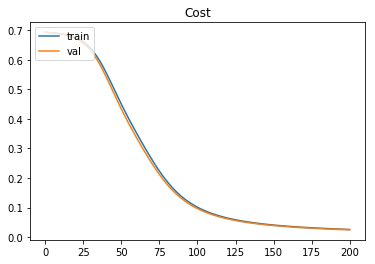

In [95]:
parameters = Model(X_train, Y_train, X_val, Y_val, layers_dims, epochs, learning_rate)